In [2]:
import pandas as pd

# 1. Đọc dữ liệu từ file (nếu bạn chưa load vào biến df)
df = pd.read_csv('original_file.csv')
df_summary = df.groupby(['numeric_id', 'IMAGE'])['FIX_DURATION'].sum().reset_index()
# 3. Đổi tên cột kết quả cho rõ nghĩa (ví dụ: total_duration)
df_summary.rename(columns={'FIX_DURATION': 'total_duration'}, inplace=True)
# 5. Kiểm tra kết quả
print(df_summary.head())
# 6. Lưu Dataframe mới (df_summary) để dùng sau này
df_summary.to_csv('summary_duration.csv', index=False)

   numeric_id        IMAGE  total_duration
0           0  act_001.jpg            4274
1           0  act_002.jpg            4404
2           0  act_003.jpg            4376
3           0  act_004.jpg            4307
4           0  act_005.jpg            4423


In [3]:
# Tính thời gian nhìn trung bình theo chỉ số nhìn (FIX_INDEX) cho mỗi ảnh và mỗi nhóm label
df_avg_index = df.groupby(['IMAGE', 'label', 'FIX_INDEX'])['FIX_DURATION'].mean().reset_index()
# 3. Đổi tên cột kết quả cho dễ hiểu
df_avg_index.rename(columns={'FIX_DURATION': 'avg_duration'}, inplace=True)
# 4. Kiểm tra kết quả
# Kết quả sẽ cho biết: Với ảnh A, nhóm label 0, ở lần nhìn thứ 1 (index 1) thì nhìn trung bình bao nhiêu ms.
print(df_avg_index.head())
# 5. Lưu kết quả ra file mới
df_avg_index.to_csv('avg_duration_per_index.csv', index=False)

         IMAGE  label  FIX_INDEX  avg_duration
0  act_001.jpg      0          1    179.462500
1  act_001.jpg      0          2    300.262500
2  act_001.jpg      0          3    404.850000
3  act_001.jpg      0          4    346.670886
4  act_001.jpg      0          5    323.303797


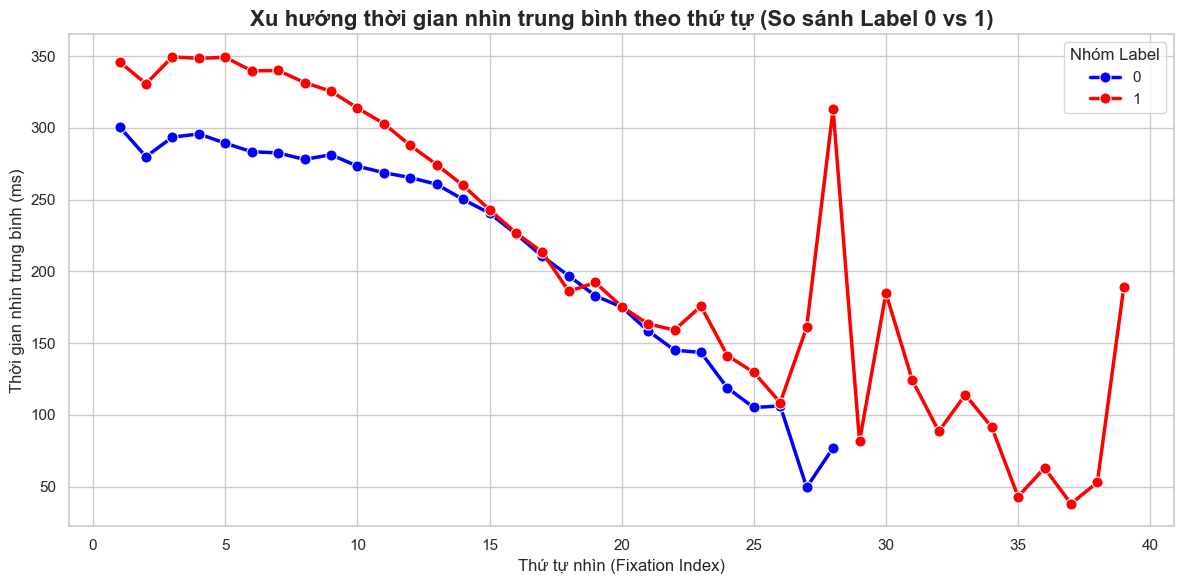

In [4]:

import seaborn as sns
import matplotlib.pyplot as plt
# BƯỚC 1: Gom nhóm tổng quan (Bỏ qua cột IMAGE)
# Tính trung bình duration cho mỗi index và label trên TẤT CẢ các ảnh
df_global_trend = df_avg_index.groupby(['label', 'FIX_INDEX'])['avg_duration'].mean().reset_index()

# BƯỚC 2: Vẽ biểu đồ đường
plt.figure(figsize=(12, 6)) # Thiết lập kích thước ảnh
sns.set_theme(style="whitegrid") # Thiết lập style nền lưới cho dễ nhìn

# Sử dụng seaborn lineplot
# x: trục hoành là thứ tự index
# y: trục tung là thời gian trung bình
# hue='label': Tự động tách ra 2 đường màu khác nhau dựa theo label (0 và 1)
# marker='o': Đánh dấu chấm tròn tại các điểm dữ liệu
sns.lineplot(
    data=df_global_trend,
    x='FIX_INDEX',
    y='avg_duration',
    hue='label',
    palette=['blue', 'red'], # Màu xanh cho label 0, đỏ cho label 1 (tuỳ chọn)
    marker='o', markersize=8, linewidth=2.5
)

# BƯỚC 3: Trang trí biểu đồ
plt.title('Xu hướng thời gian nhìn trung bình theo thứ tự (So sánh Label 0 vs 1)', fontsize=16, fontweight='bold')
plt.xlabel('Thứ tự nhìn (Fixation Index)', fontsize=12)
plt.ylabel('Thời gian nhìn trung bình (ms)', fontsize=12)
plt.legend(title='Nhóm Label', title_fontsize='12')

# Hiển thị tất cả các số index ở trục X cho dễ đọc (nếu index không quá nhiều)
# plt.xticks(df_global_trend['FIX_INDEX'].unique())

plt.tight_layout()
plt.show()

Đang vẽ biểu đồ cho ảnh: act_001.jpg


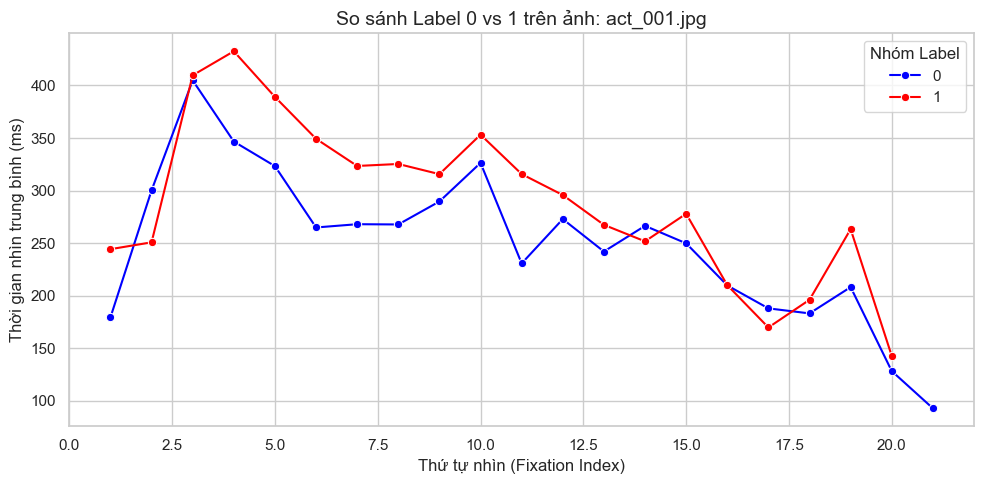

In [5]:
# BƯỚC 1: Chọn ra một tên ảnh để vẽ
# Lấy tên bức ảnh đầu tiên xuất hiện trong dữ liệu
example_image_name = df_avg_index['IMAGE'].iloc[0]
print(f"Đang vẽ biểu đồ cho ảnh: {example_image_name}")

# Lọc dữ liệu chỉ lấy ảnh này
df_subset = df_avg_index[df_avg_index['IMAGE'] == example_image_name]

# BƯỚC 2: Vẽ biểu đồ (Code tương tự như trên, chỉ thay nguồn data)
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

sns.lineplot(
    data=df_subset,
    x='FIX_INDEX',
    y='avg_duration',
    hue='label', # Vẫn chia màu theo label
    palette=['blue', 'red'],
    marker='o'
)

plt.title(f'So sánh Label 0 vs 1 trên ảnh: {example_image_name}', fontsize=14)
plt.xlabel('Thứ tự nhìn (Fixation Index)')
plt.ylabel('Thời gian nhìn trung bình (ms)')
plt.legend(title='Nhóm Label')
plt.tight_layout()
plt.show()

In [6]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tạo thư mục để chứa ảnh (nếu chưa có thì tự tạo)
output_folder = "Bieu_Do_Chi_Tiet"
os.makedirs(output_folder, exist_ok=True)
print(f"Đã tạo (hoặc tìm thấy) thư mục: {output_folder}")

# 2. Lấy danh sách tên các bức ảnh duy nhất
unique_images = df_avg_index['IMAGE'].unique()
print(f"Tổng số lượng ảnh cần vẽ: {len(unique_images)}")

# 3. Thiết lập giao diện chung
sns.set_theme(style="whitegrid")

# 4. Chạy vòng lặp để vẽ và lưu từng ảnh
for i, img_name in enumerate(unique_images):
    # Lọc dữ liệu chỉ của ảnh hiện tại
    df_subset = df_avg_index[df_avg_index['IMAGE'] == img_name]
    
    # Tạo khung vẽ mới
    plt.figure(figsize=(8, 5))
    
    # Vẽ biểu đồ đường
    sns.lineplot(
        data=df_subset,
        x='FIX_INDEX',
        y='avg_duration',
        hue='label',
        palette=['blue', 'red'],
        marker='o'
    )
    
    # Đặt tiêu đề và nhãn
    plt.title(f'So sánh Label 0 vs 1 - Ảnh: {img_name}')
    plt.xlabel('Thứ tự nhìn (Index)')
    plt.ylabel('Thời gian (ms)')
    
    # Lưu file vào thư mục đã tạo
    # os.path.join giúp nối đường dẫn thư mục và tên file một cách chuẩn xác
    # Tên file sẽ là: Bieu_Do_Chi_Tiet/outman_054.png
    save_path = os.path.join(output_folder, f"{img_name}.png")
    plt.savefig(save_path, bbox_inches='tight')
    
    # QUAN TRỌNG: Đóng biểu đồ để giải phóng RAM (nếu không máy sẽ bị tràn bộ nhớ sau 50 ảnh)
    plt.close()

    # In tiến độ để bạn biết máy đang chạy đến đâu
    if (i + 1) % 10 == 0:
        print(f"Đã lưu xong {i + 1}/{len(unique_images)} ảnh...")

print("Hoàn tất! Hãy mở thư mục 'Bieu_Do_Chi_Tiet' để xem kết quả.")

Đã tạo (hoặc tìm thấy) thư mục: Bieu_Do_Chi_Tiet
Tổng số lượng ảnh cần vẽ: 100
Đã lưu xong 10/100 ảnh...
Đã lưu xong 20/100 ảnh...
Đã lưu xong 30/100 ảnh...
Đã lưu xong 40/100 ảnh...
Đã lưu xong 50/100 ảnh...
Đã lưu xong 60/100 ảnh...
Đã lưu xong 70/100 ảnh...
Đã lưu xong 80/100 ảnh...
Đã lưu xong 90/100 ảnh...
Đã lưu xong 100/100 ảnh...
Hoàn tất! Hãy mở thư mục 'Bieu_Do_Chi_Tiet' để xem kết quả.


In [7]:

# 1. Tính trung bình độ mở Pupil (FIX_PUPIL) theo từng Index
# Lưu ý: Phải dùng 'df' gốc ban đầu (chưa bị group)
df_avg_pupil = df.groupby(['IMAGE', 'label', 'FIX_INDEX'])['FIX_PUPIL'].mean().reset_index()

# Đổi tên cột cho dễ nhớ
df_avg_pupil.rename(columns={'FIX_PUPIL': 'avg_pupil'}, inplace=True)

# 2. Tạo thư mục để chứa ảnh mới
output_folder = "Bieu_Do_Pupil"
os.makedirs(output_folder, exist_ok=True)
print(f"Đã tạo thư mục: {output_folder}")

# 3. Lấy danh sách ảnh
unique_images = df_avg_pupil['IMAGE'].unique()
print(f"Tổng số lượng ảnh cần vẽ: {len(unique_images)}")

# 4. Thiết lập giao diện
sns.set_theme(style="whitegrid")

# 5. Vòng lặp vẽ và lưu
for i, img_name in enumerate(unique_images):
    # Lọc dữ liệu của ảnh hiện tại
    df_subset = df_avg_pupil[df_avg_pupil['IMAGE'] == img_name]
    
    plt.figure(figsize=(8, 5))
    
    # Vẽ biểu đồ đường cho Pupil
    sns.lineplot(
        data=df_subset,
        x='FIX_INDEX',
        y='avg_pupil',  # Dữ liệu trục tung là độ mở pupil
        hue='label',
        palette=['blue', 'red'], # Xanh cho label 0, Đỏ cho label 1
        marker='o'
    )
    
    # Đặt tiêu đề và nhãn
    plt.title(f'Độ mở Pupil trung bình - Ảnh: {img_name}')
    plt.xlabel('Thứ tự nhìn (Index)')
    plt.ylabel('Kích thước Pupil trung bình')
    
    # Lưu file
    save_path = os.path.join(output_folder, f"Pupil_{img_name}.png")
    plt.savefig(save_path, bbox_inches='tight')
    plt.close() # Đóng để giải phóng RAM

    # Thông báo tiến độ
    if (i + 1) % 10 == 0:
        print(f"Đã lưu xong {i + 1}/{len(unique_images)} ảnh...")

print("Hoàn tất! Hãy kiểm tra folder 'Bieu_Do_Pupil'.")

Đã tạo thư mục: Bieu_Do_Pupil
Tổng số lượng ảnh cần vẽ: 100
Đã lưu xong 10/100 ảnh...
Đã lưu xong 20/100 ảnh...
Đã lưu xong 30/100 ảnh...
Đã lưu xong 40/100 ảnh...
Đã lưu xong 50/100 ảnh...
Đã lưu xong 60/100 ảnh...
Đã lưu xong 70/100 ảnh...
Đã lưu xong 80/100 ảnh...
Đã lưu xong 90/100 ảnh...
Đã lưu xong 100/100 ảnh...
Hoàn tất! Hãy kiểm tra folder 'Bieu_Do_Pupil'.
